In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("../data/raw/1-3_rooms_2025-04-30_19-21.csv")
df

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,ID 12891703,homeowner,https://www.cian.ru/sale/flat/315747133/,Москва,sale,flat,10,18,1,32.0,-1,0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад,Апарт-комплекс Легендарный квартал
1,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/315253252/,Москва,sale,flat,71,79,1,79.0,-1,0,75000000,Пресненский,1-й Красногвардейский проезд,22с2,Москва-Сити,NEVA TOWERS
2,Доступный дом,real_estate_agent,https://www.cian.ru/sale/flat/316724491/,Москва,sale,flat,3,17,1,35.4,-1,0,13880000,NaN,Эдварда Грига,15,Потапово,NaN
3,Семен Гордый,realtor,https://www.cian.ru/sale/flat/286050252/,Москва,sale,flat,5,9,1,42.5,-1,0,7150000,NaN,Семена Гордого,12,Крёкшино,Ново-Никольское
4,Champine,real_estate_agent,https://www.cian.ru/sale/flat/316709399/,Москва,sale,flat,8,13,1,54.8,-1,0,40948000,Южнопортовый,Сосинская,8,Волгоградский проспект,Champine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,ЗАПАДНЫЙ САД,real_estate_agent,https://www.cian.ru/sale/flat/316941185/,Москва,sale,flat,9,14,3,67.0,-1,0,57000000,Раменки,проспект Генерала Дорохова,39к1Б,Поклонная,Собрание клубных домов West Garden
376,Champine,real_estate_agent,https://www.cian.ru/sale/flat/316709381/,Москва,sale,flat,6,13,3,101.1,-1,0,60963630,Южнопортовый,Сосинская,8,Волгоградский проспект,Champine
377,Homeapp,real_estate_agent,https://www.cian.ru/sale/flat/314699443/,Москва,sale,flat,4,5,3,62.0,-1,0,25990000,Сокол,Новопесчаная,11/6,Сокол,NaN
378,BARNES International Realty,real_estate_agent,https://www.cian.ru/sale/flat/315561813/,Москва,sale,flat,4,8,3,110.0,-1,0,93795840,Хамовники,Гагаринский переулок,28,Смоленская,NaN


In [48]:
df.columns

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price_per_month', 'commissions', 'price', 'district',
       'street', 'house_number', 'underground', 'residential_complex'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               380 non-null    object 
 1   author_type          380 non-null    object 
 2   url                  380 non-null    object 
 3   location             380 non-null    object 
 4   deal_type            380 non-null    object 
 5   accommodation_type   380 non-null    object 
 6   floor                380 non-null    int64  
 7   floors_count         380 non-null    int64  
 8   rooms_count          380 non-null    int64  
 9   total_meters         380 non-null    float64
 10  price_per_month      380 non-null    int64  
 11  commissions          380 non-null    int64  
 12  price                380 non-null    int64  
 13  district             358 non-null    object 
 14  street               379 non-null    object 
 15  house_number         377 non-null    obj

In [50]:
df.nunique()

author                 164
author_type              5
url                    380
location                 1
deal_type                1
accommodation_type       1
floor                   42
floors_count            53
rooms_count              3
total_meters           263
price_per_month          1
commissions              1
price                  281
district                94
street                 236
house_number           212
underground            147
residential_complex    105
dtype: int64

Удалим константные столбцы, и столбцы содержащие все уникальные значениям (url)

In [51]:
df.drop(['location', 'deal_type', 'accommodation_type', 'price_per_month', 'commissions', 'url'], axis=1, inplace=True)

In [52]:
df

,author,author_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,ID 12891703,homeowner,10,18,1,32.0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад,Апарт-комплекс Легендарный квартал
1,Whitewill,real_estate_agent,71,79,1,79.0,75000000,Пресненский,1-й Красногвардейский проезд,22с2,Москва-Сити,NEVA TOWERS
2,Доступный дом,real_estate_agent,3,17,1,35.4,13880000,NaN,Эдварда Грига,15,Потапово,NaN
3,Семен Гордый,realtor,5,9,1,42.5,7150000,NaN,Семена Гордого,12,Крёкшино,Ново-Никольское
4,Champine,real_estate_agent,8,13,1,54.8,40948000,Южнопортовый,Сосинская,8,Волгоградский проспект,Champine
...,...,...,...,...,...,...,...,...,...,...,...,...
375,ЗАПАДНЫЙ САД,real_estate_agent,9,14,3,67.0,57000000,Раменки,проспект Генерала Дорохова,39к1Б,Поклонная,Собрание клубных домов West Garden
376,Champine,real_estate_agent,6,13,3,101.1,60963630,Южнопортовый,Сосинская,8,Волгоградский проспект,Champine
377,Homeapp,real_estate_agent,4,5,3,62.0,25990000,Сокол,Новопесчаная,11/6,Сокол,NaN
378,BARNES International Realty,real_estate_agent,4,8,3,110.0,93795840,Хамовники,Гагаринский переулок,28,Смоленская,NaN


In [53]:
df.isna().sum()

author                   0
author_type              0
floor                    0
floors_count             0
rooms_count              0
total_meters             0
price                    0
district                22
street                   1
house_number             3
underground              3
residential_complex    178
dtype: int64

Удалим столбцы-имена собственные:

In [54]:
df.drop(['author', 'author_type', 'residential_complex'], axis=1, inplace=True)

In [55]:
df

,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground
0,10,18,1,32.0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад
1,71,79,1,79.0,75000000,Пресненский,1-й Красногвардейский проезд,22с2,Москва-Сити
2,3,17,1,35.4,13880000,NaN,Эдварда Грига,15,Потапово
3,5,9,1,42.5,7150000,NaN,Семена Гордого,12,Крёкшино
4,8,13,1,54.8,40948000,Южнопортовый,Сосинская,8,Волгоградский проспект
...,...,...,...,...,...,...,...,...,...
375,9,14,3,67.0,57000000,Раменки,проспект Генерала Дорохова,39к1Б,Поклонная
376,6,13,3,101.1,60963630,Южнопортовый,Сосинская,8,Волгоградский проспект
377,4,5,3,62.0,25990000,Сокол,Новопесчаная,11/6,Сокол
378,4,8,3,110.0,93795840,Хамовники,Гагаринский переулок,28,Смоленская


Посмотрим на распределение цены:

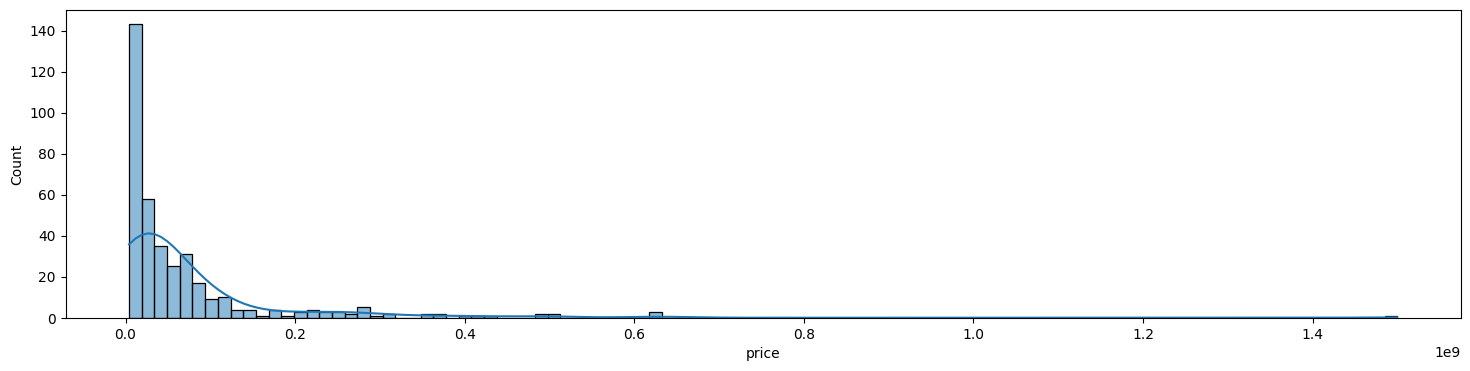

In [56]:
fig = plt.figure(figsize=(18, 4))
sns.histplot(df['price'], kde=True, bins=100);

Распределение комнатности квартир:

In [57]:
df['rooms_count'].value_counts()

rooms_count
3    140
1    131
2    109
Name: count, dtype: int64

Достаточно равномерно

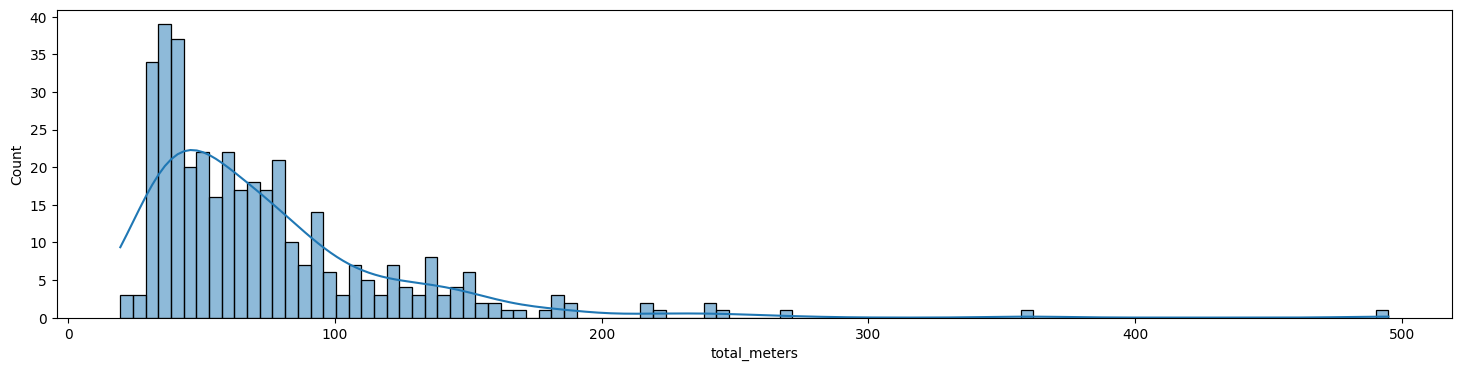

In [58]:
fig = plt.figure(figsize=(18, 4))
sns.histplot(df['total_meters'], kde=True, bins=100);

Посмотрим на выбросы в цене и в метрах:

In [60]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [61]:
need_columns = ['total_meters', 'price']
for column in need_columns:
    print(detect_outliers(df[[column]],column).drop_duplicates())

     total_meters
96         495.00
246        242.97
249        246.00
356        360.00
364        269.40
          price
171   400000000
176   350000000
221   280000000
244   500135731
246   490000000
249   367027200
273   488000000
280   357500000
283   422000000
288   279000000
292   368000000
298   310000000
303   630000000
356  1499900000
360   300000000
364   424120320


In [62]:
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

In [63]:
clean_df = df
for column in need_columns:
    clean_df = drop_outliers(clean_df, column)

In [64]:
clean_df

,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground
0,10,18,1,32.0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад
1,71,79,1,79.0,75000000,Пресненский,1-й Красногвардейский проезд,22с2,Москва-Сити
2,3,17,1,35.4,13880000,NaN,Эдварда Грига,15,Потапово
3,5,9,1,42.5,7150000,NaN,Семена Гордого,12,Крёкшино
4,8,13,1,54.8,40948000,Южнопортовый,Сосинская,8,Волгоградский проспект
...,...,...,...,...,...,...,...,...,...
375,9,14,3,67.0,57000000,Раменки,проспект Генерала Дорохова,39к1Б,Поклонная
376,6,13,3,101.1,60963630,Южнопортовый,Сосинская,8,Волгоградский проспект
377,4,5,3,62.0,25990000,Сокол,Новопесчаная,11/6,Сокол
378,4,8,3,110.0,93795840,Хамовники,Гагаринский переулок,28,Смоленская


После удаления выбросов осталось 354 квартиры

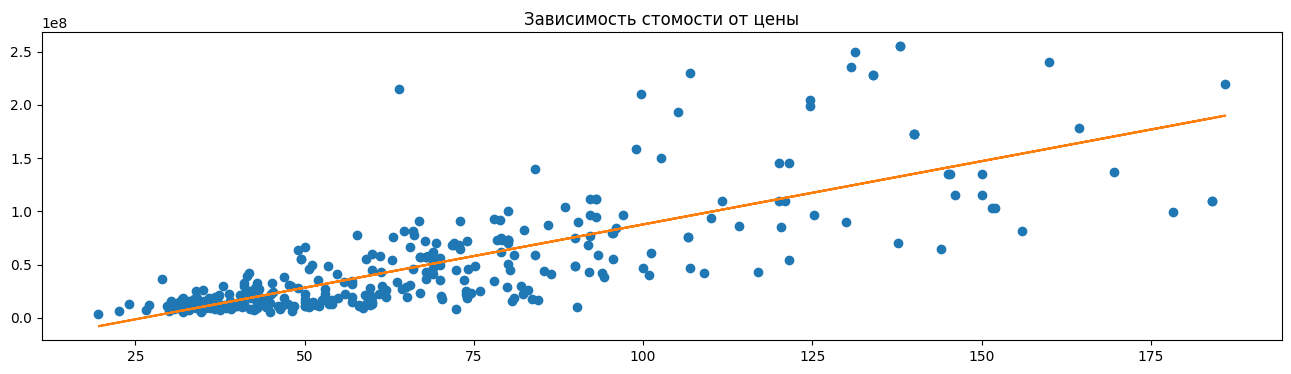

In [68]:
fig = plt.figure(figsize=(16, 4))
x = clean_df['total_meters']
y = clean_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
plt.title('Зависимость стомости от цены')
plt.plot(x, m*x+b);

In [70]:
clean_df.to_csv("../data/processed/clean_flat_data.csv")